In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import time
import datetime
import pandas as pd

In [2]:
## Convert given date to unix-milliseconds
date1 = '2022-01-23'
unix = pd.to_datetime(date1).value // 10**9
print(date1,":",unix)

date2 = '2022-01-24'
unix = pd.to_datetime(date2).value // 10**9
print(date2,":",unix)

2022-01-23 : 1642896000
2022-01-24 : 1642982400


In [3]:
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1642896000&to=1642982400'
## Preparing the Request
req = Request('GET', url)

## Creating the Session
sess = Session()

## Making the Request
prepped = sess.prepare_request(req)

## Sending the Request
try:
    resp = sess.send(prepped)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
else:
    print(resp.status_code, resp.reason)
    print(resp.text)
    

200 OK
{"prices":[[1642896166621,35180.435462830384],[1642899604966,35432.61134395314],[1642903362311,35448.608106994194],[1642906830933,35044.59262923074],[1642910508104,35176.65728559375],[1642914151050,35348.42857530886],[1642917659189,35591.25705774395],[1642921325713,35342.902225939535],[1642924951086,35673.892148853825],[1642928575653,35760.80532005177],[1642932210452,35974.488705639684],[1642935648639,35898.49265417996],[1642939382142,35764.30539081825],[1642942855334,35924.69475847814],[1642946608245,36066.53867510662],[1642950193192,35208.08509273927],[1642954326416,35476.641272607],[1642957238487,35363.39608281859],[1642960836652,35472.73143627676],[1642964487734,35005.57945651765],[1642968200712,34804.560652713786],[1642971750755,35332.049887473404],[1642975229876,35566.67303014184],[1642978900086,35578.38113726986]],"market_caps":[[1642896166621,666220701468.4846],[1642899604966,671229135223.7238],[1642903362311,672843789878.7097],[1642906830933,663652347029.8301],[16429105

In [4]:
data = json.loads(resp.text)
prices = data['prices']

df = pd.DataFrame(prices)

In [5]:
df.head()

,0,1
0,1642896166621,35180.435463
1,1642899604966,35432.611344
2,1642903362311,35448.608107
3,1642906830933,35044.592629
4,1642910508104,35176.657286


In [6]:
## Change column names to ['timestamp', 'price']
df.columns = ['timestamp', 'price']
df.head()

,timestamp,price
0,1642896166621,35180.435463
1,1642899604966,35432.611344
2,1642903362311,35448.608107
3,1642906830933,35044.592629
4,1642910508104,35176.657286


In [7]:
## Convert timestamp format from unix-milliseconds to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.head()

,timestamp,price
0,2022-01-23 00:02:46.621,35180.435463
1,2022-01-23 01:00:04.966,35432.611344
2,2022-01-23 02:02:42.311,35448.608107
3,2022-01-23 03:00:30.933,35044.592629
4,2022-01-23 04:01:48.104,35176.657286


In [8]:
## Seperate date and time from timestamp column
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time
## Drope timestamp column
df.drop(columns=['timestamp'], inplace=True)
df.head()

,price,date,time
0,35180.435463,2022-01-23,00:02:46.621000
1,35432.611344,2022-01-23,01:00:04.966000
2,35448.608107,2022-01-23,02:02:42.311000
3,35044.592629,2022-01-23,03:00:30.933000
4,35176.657286,2022-01-23,04:01:48.104000


In [9]:
## Remove value after decimal point from second in time column
df['time'] = df['time'].astype(str).str[:8]
df.head()

,price,date,time
0,35180.435463,2022-01-23,00:02:46
1,35432.611344,2022-01-23,01:00:04
2,35448.608107,2022-01-23,02:02:42
3,35044.592629,2022-01-23,03:00:30
4,35176.657286,2022-01-23,04:01:48


<AxesSubplot:xlabel='time'>

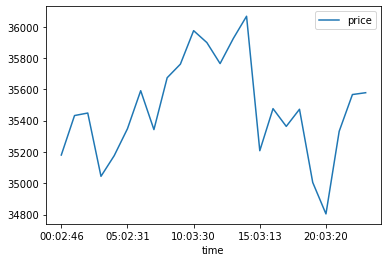

In [11]:
## Plot the price data in a line chart
df.plot(x='time', y='price', kind='line')

In [12]:
data_loc = '../Data/'
df.to_csv(data_loc + 'bitcoin_price_data.csv', index=False)